In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [4]:
# Data Collection & Analysis
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
print('rows: ',data.shape[0])
print('columns: ',data.shape[1])

rows:  200
columns:  5


In [6]:
# getting some informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#Choosing the Annual Income Column & Spending Score column
x=data.iloc[:,[3,4]].values

In [12]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [15]:
#Choosing the number of clusters from WCSS
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

In [16]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21881.878507060967,
 19657.783608703954]

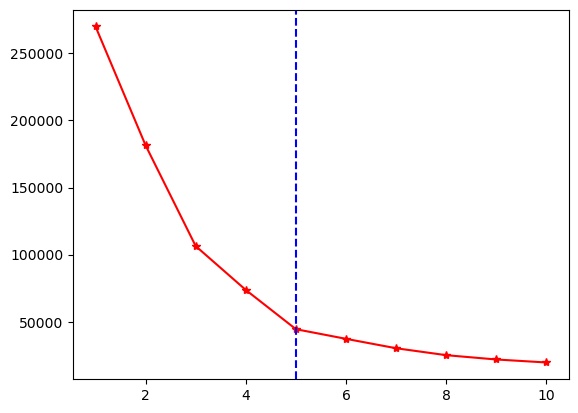

In [18]:
# lets visulaize the Wcss
# Elbow Plot

plt.plot(range(1,11),wcss,color='red',marker='*')
plt.axvline(x=5,color='blue',ls='--')
plt.show()

In [19]:
# there is another way to draw this scree plot/elbow plot using Yellowbrick

In [20]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

In [21]:
k_elbow=KElbowVisualizer(KMeans(),k=10)

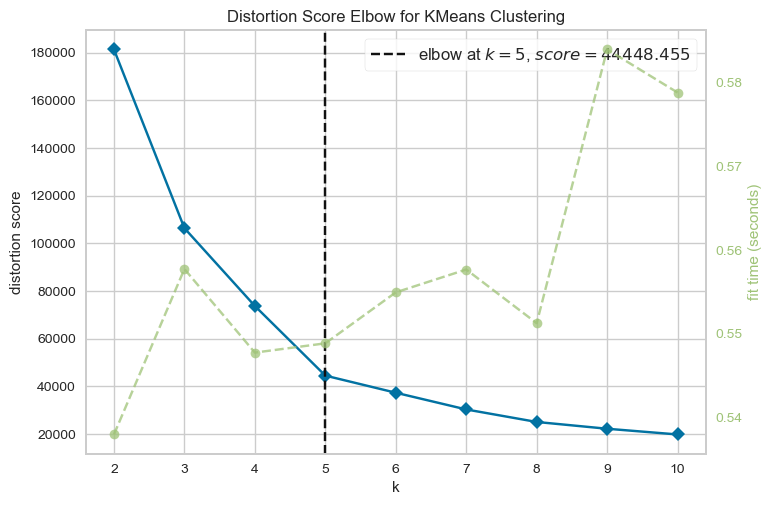

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
k_elbow.fit(x)
k_elbow.show()

In [23]:
# optimum number of cluster=5

In [24]:
# Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=5)

In [25]:
kmeans.fit(x)

KMeans(n_clusters=5)

In [27]:
data['K_means_pred']=kmeans.predict(x)

In [28]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_means_pred
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


In [29]:
data['K_means_pred'].value_counts()

1    81
2    39
4    35
0    23
3    22
Name: K_means_pred, dtype: int64

In [30]:
centroids=kmeans.cluster_centers_
centroids

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

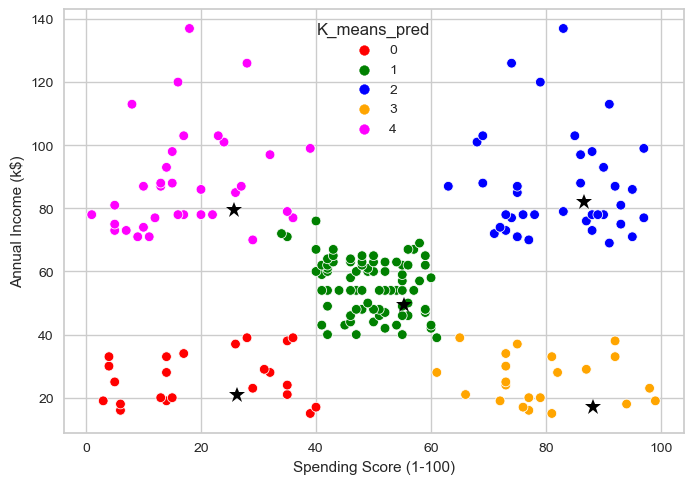

In [35]:
# visualize the clusters
sns.scatterplot(x=data['Spending Score (1-100)'],
                y=data['Annual Income (k$)'],
                hue=data['K_means_pred'],
                palette=['red','green','blue','orange','magenta'])
for i in range(5):
    plt.plot(centroids[i][0],centroids[i][1],color='black',marker='*',ms=12)
plt.show()

In [34]:
data.groupby(by='K_means_pred').mean()[['Annual Income (k$)','Age','Spending Score (1-100)']]

,Annual Income (k$),Age,Spending Score (1-100)
K_means_pred,,,
0,26.304348,45.217391,20.913043
1,55.296296,42.716049,49.518519
2,86.538462,32.692308,82.128205
3,25.727273,25.272727,79.363636
4,88.200000,41.114286,17.114286


In [ ]:
# cluster 4 is having high annual income but are spending less so the mall business management teams should focus on customer on cluster no 4 